In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import mglearn

# 나눔 폰트를 사용합니다.
matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### 1.Binary classification

X.shape: (26, 2)


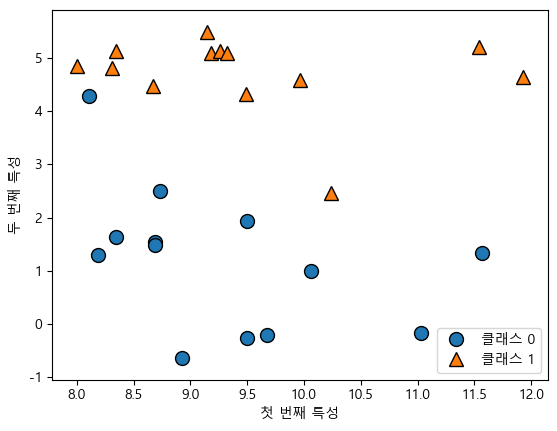

In [10]:
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:", X.shape)
plt.show() 

# X.shape의 결과값은 (26, 2)로 
# 26개의 데이터포이트와 2개의 특성이 있다는 것을 알 수 있다.

### 1-1.Load_breast_cancer
---
유방암 종양의 임상데이터를 기록한 위스콘신 유방암 데이터셋
- 종양은 benign인 양성과 malignant인 음성으로 레이블 되어 있고
- 조직데이터를 기반으로 악성인지 아닌지 예측하는 것이 최종 목표이다

In [16]:
# sklearn에 들어있는 datasets에서 load_breast_cancer 불러오기
from sklearn.datasets import load_breast_cancer

# 데이터셋 이름은 cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
print("유방암 데이터의 형태:", cancer.data.shape)
# 569개의 데이터 포인트를 가지고 있으며, 특성이 30개이다.

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 형태: (569, 30)


In [24]:
given_array = [3,2,2,6,7,4,8,9,9,9]
print(np.bincount(given_array))
# 0부터 9까지 각각의 숫자가 몇 번 나왔는지 알려준다
# 0은 0번, 1은 0번, 2는 2번, 3은 1번, 4는 1번, 이런식으로...


[0 0 2 1 1 0 1 1 1 3]


In [17]:
print("클래스별 샘플 갯수:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
# 해석 : cancer.target_names와 np.bincount(cancer.target)를 딕셔너리 형식으로 반환할건데,
# cancer.target_names는 'malignant', 'benign' 2개로 구성되어 있어 각각 몇 개가 나오는지 
# {'malignant': 212, 'benign': 357} 형식으로 반환해라

# 569개중 악성은 212개, 양성으 357개이다.

클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}


In [25]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 2.Regression

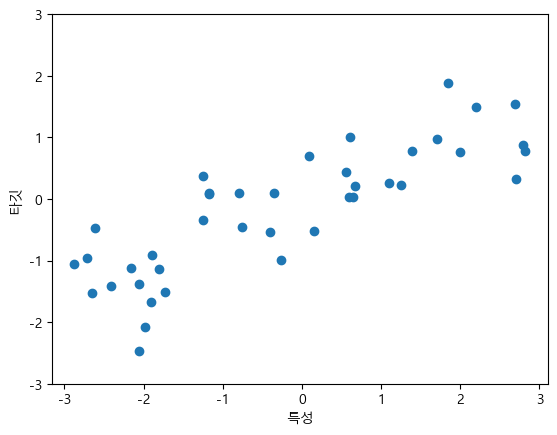

In [12]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")
plt.show() 

### 2-1.Load_boston_housing
---
보스턴 주택가격 데이터셋
- 범죄율, 찰스강 인접도, 고속도로 접근성 등의 정보를 이용해서  
- 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것이 목표다.  

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태:", boston.data.shape)
# 506개의 데이터포인트를 가졌고 13개의 특성을 가진다.

데이터의 형태: (506, 13)


In [29]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


### 3.K-최근접 이웃(K-Nearest Neighbors)

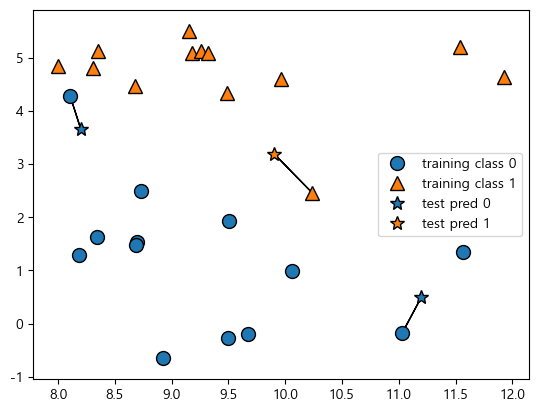

In [33]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

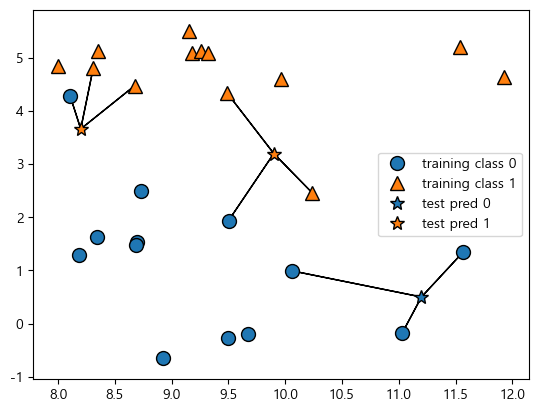

In [34]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

#### 3-1. 알고리즘 살펴보기

In [41]:
from sklearn.model_selection import train_test_split

# 데이터 적재(데이터셋 X와 데이터 레이블 y)
X, y = mglearn.datasets.make_forge()

# training set, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# KNeighborsClassifier객체 만들고 neighbors 개수 지정
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

# 훈련 데이터셋으로 모델 구축
clf.fit(X_train, y_train)

# 새로운 데이터 포인트 넣기
print("테스트 세트 예측:", clf.predict(X_test))

# 정확도 체크하기
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]
테스트 세트 정확도: 0.86


### 4.KNeighborsClassifier 분석

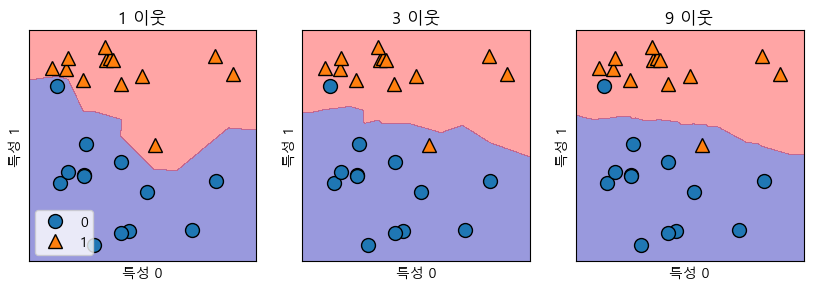

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
# fig 행, axes는 열로 
# 1개 행에 3개씩 그릴거라는 뜻

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    
    # 모델 구축
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)
plt.show()

### 5.모델 복잡도와 일반화 관계


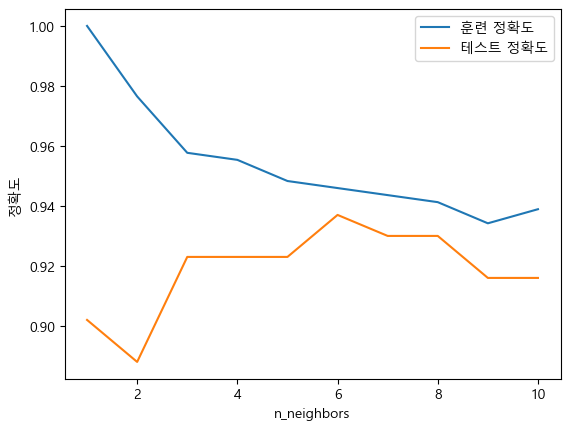

In [52]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show() 

### 6.K-최근접 이웃 회귀

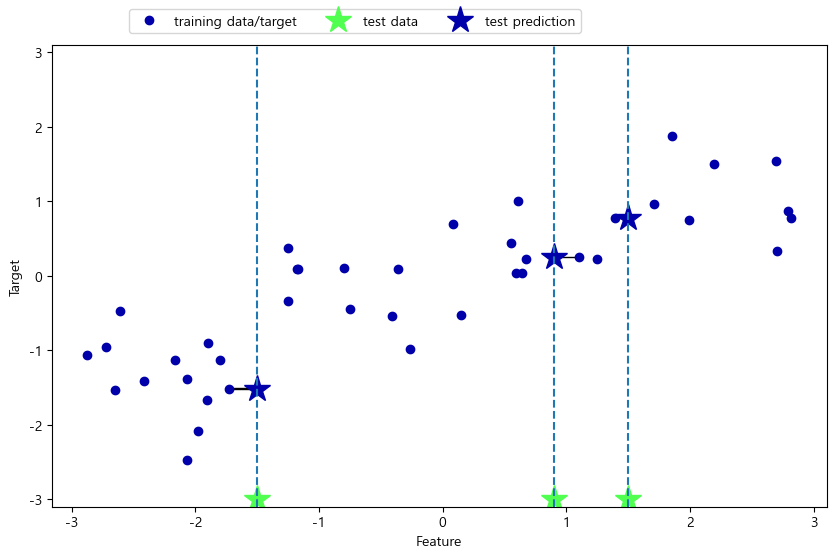

In [53]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

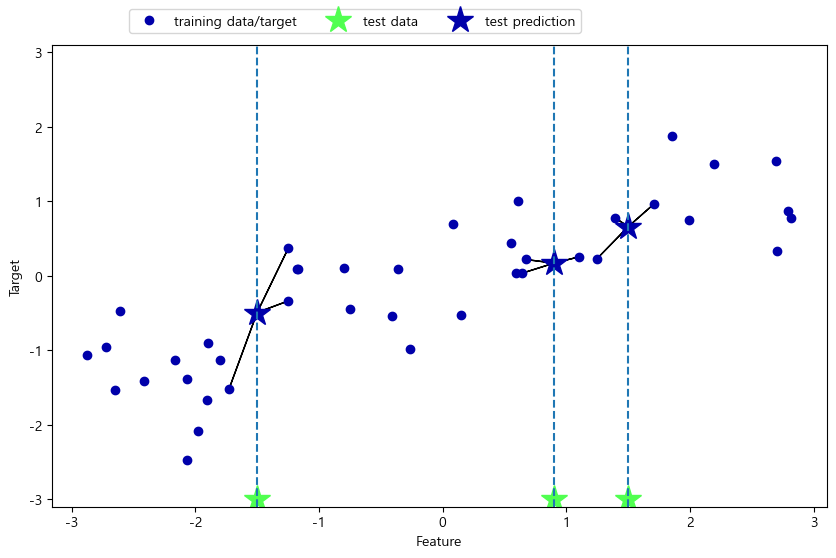

In [54]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [63]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [60]:
print("테스트 세트 예측:\n", reg.predict(X_test), "\n")

print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398] 

테스트 세트 R^2: 0.83


### 7.KNeighborsRegressor 분석

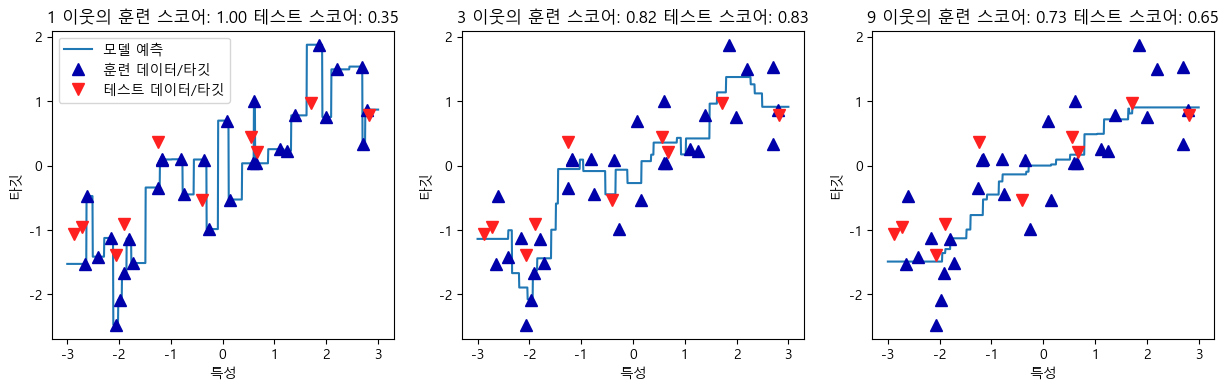

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show() 